# More Unsupervised Learning Models


## Lesson Goals

In this lesson we will expand our repertoire of unsupervised learning models by introducing Gaussian Mixture Models and DBSCAN. These are two unsupervised learning models that are typically used for clustering.


## Introduction

So far we have covered K-Means and Hierarchical Clustering. However, different types of data work better with different types of clustering. In this lesson we will cover DBSCAN, which is a clustering method based on the density of the data. We will also cover Gaussian Mixture Models, which is a model that assigns a probability of an observation belonging to each cluster, rather than a definitive answer.


## Different Clustering Techniques for Different Data

As previously mentioned, there are different types of data that works better with different types of clustering algorithm. Below is a famous example from the Scikit-Learn documentation.


![](../cluster_models.png)


We can see that K-Means completely fails to detect the two clusters in the first and second rows. Hierarchical clustering (here named Ward and Agglomerative Clustering) have some success. Ward clustering has little success with the first dataset while agglomerative clustering has better success. However, both take about 6-7 times as long as DBSCAN to cluster the data. Gaussian mixture has great success in dataset number 4 and produces an interesting split of the data in dataset number 6. Scenario 6 is something that DBSCAN cannot handle at all.


# DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an algorithm that clusters points based on density, or in other words, based on how close they are to each other. The algorithm creates clusters from points that are packed together and treats points that are far apart as outliers.

**Advantages**

    We do not need to determine the number of clusters. However, we still tweak some parameters. Instead 
    of selecting the number of clusters, we specify the minimum number of points required for a cluster 
    and the distance between points in a cluster (known as ε in this algorithm).
    
    Another advantage is that the algorithm is more computationally efficient since we determine 
    the classification of all points in one pass through the dataset.
    
    This algorithm is more robust to outliers than some other clustering algorithms.

**Disadvantages**

This algorithm is not without any disadvantages. We saw in the image of clustering techniques that it cannot handle scenarios where the density of all points is uniform. In these scenarios, we would be better off using a different clustering algorithm. Additionally, the algorithm is only as good as the distance metric we use. Typically, we use the Euclidean distance, but this does not always produce the best results for every dataset.


## The Algorithm

There are three types of points in DBSCAN: core points, border points, and noise points.

In the algorithm we iterate over all points. For each point we determine whether there are a minimum number of close points within a distance of ε. If so, we classify the point as a core point and add it to the cluster.

If there is no point near our point, we classify the point as noise.

Border points are points reachable from more than one cluster. We typically use a rule to determine which cluster should take which border point.


## DBSCAN in Scikit-Learn

To demonstrate DBSCAN's strength, we will generate a dataset from Scikit-Learn's dataset submodule. The make_moons function makes two crescent shapes. These shapes wouldn't be detected by algorithms like k-means but DBSCAN is able to detect them.

First, we'll load the make_moons function and then we'll generate and plot our data. We choose a random noise of 0.05 so that the shapes aren't so perfect looking and slightly harder to detect. The moons data is comprised of a tuple of observations and labels, we will only use the observations.



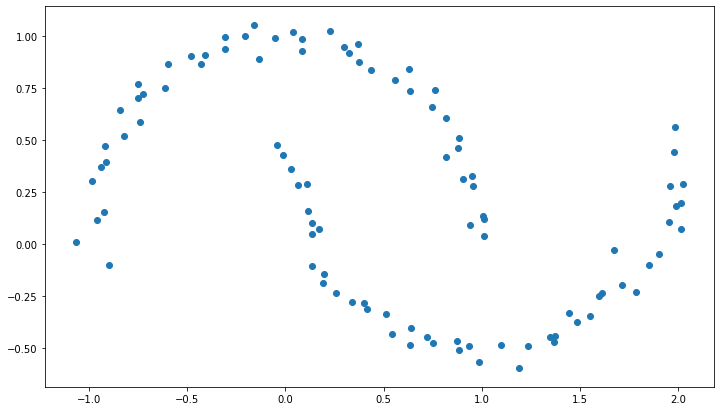

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons

moons = make_moons(n_samples=100, shuffle=True, noise=0.05)

plt.figure(figsize=(12,7))
plt.scatter(moons[0][:,0], moons[0][:,1]);

Next, we will apply the DBSCAN algorithm to our data and plot the data with the labels generated by DBSCAN.

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3).fit(moons[0])
dbscan.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

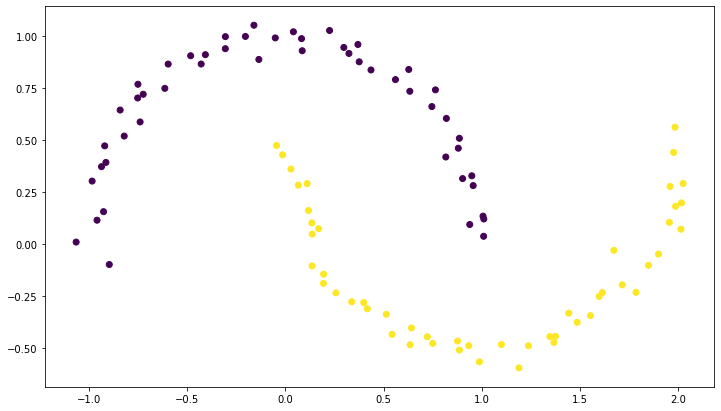

In [3]:
plt.figure(figsize=(12,7))
plt.scatter(moons[0][:,0], moons[0][:,1], c=dbscan.labels_);

# Gaussian Mixture Models

Another cluster technique that attempts to overcome the many issues with k-means clustering is GMM. This method can handle scenarios where clusters have overlapping points since it does not create a firm boundary for the cluster. Instead, it produces a probability of belonging to a cluster for each observation. We can then use these probabilities to set a threshold for belonging to a cluster or maybe leave the labels as probabilities.

GMM describes each cluster by its centroid. We then use this centroid to generate a normal distribution with the centroid as the mean.

Similar to k-means, the algorithm alternates through two steps. We call these types of algorithms expectation maximization algorithms. In the first step, we compute the expected value, in this case, the new centroids of the clusters. In the next step, we try to optimize the normal distribution. We continue doing this until convergence.


## GMM in Scikit-Learn

In this example, we will use a dataset where GMM excels. In this data, the clusters will overlap. However, the GMM algorithm will still detect the clusters using our probabilistic approach.

In our code, we first generate the data using the make_classification function provided in Scikit-Learn. This function provides us with the data and the labels. 

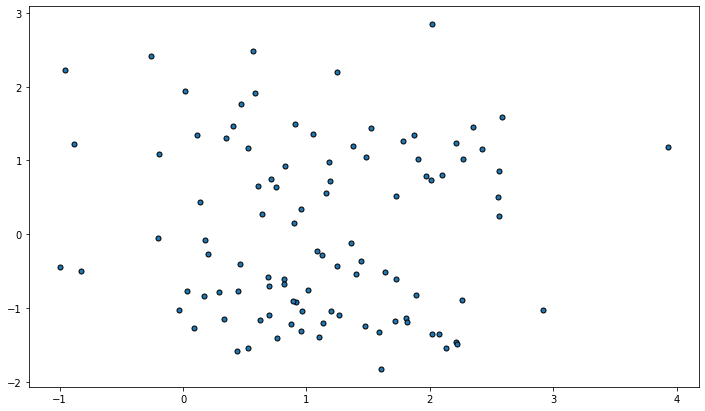

In [4]:
from sklearn.datasets import make_classification
from sklearn import mixture

X = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.figure(figsize=(12,7))
plt.scatter(X[0][:, 0], X[0][:, 1], marker='o', s=25, edgecolor='k');

As we can see, there are two clusters that overlap. However, our clustering algorithm will be able to pick up on this since it uses a probabilistic approach. In the code snippet below, we will cluster the data using GMM to produce 2 clusters. We initialize the Gaussian Mixture Model and then fit our data to the model. We then produce the labels using the predict function and use those labels to color the observations in the scatter plot. 

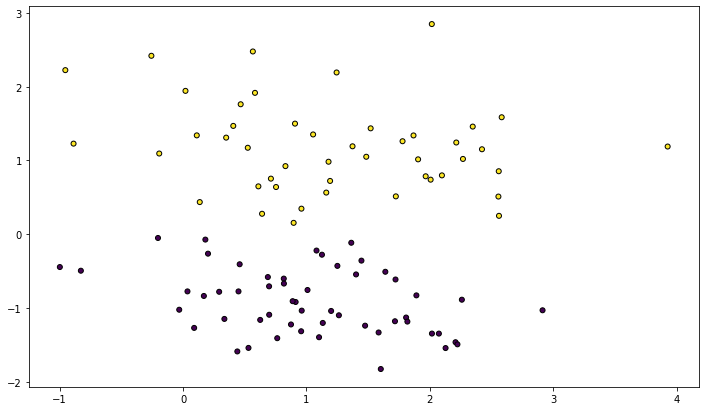

In [5]:
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X[0])

plt.figure(figsize=(12,7))
plt.scatter(X[0][:, 0], X[0][:, 1], marker='o', c=gmm.predict(X[0]),
            s=25, edgecolor='k');